# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_year.csv', index_col=0)

In [3]:
# select columns for visualization
df = df[['year', 'country_id', 'country_txt_wb', 'country_txt_gtd', 'tourism_group', 'incident_ct_total', 'population']]

In [4]:
# add incidents per capita column
df['incidents_per_capita'] = df['incident_ct_total'] / df['population']

In [5]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,tourism_group,incident_ct_total,population,incidents_per_capita
0,2012,5,Albania,NaN,NaN,0,2900401,0.000000e+00
1,2012,6,Algeria,Algeria,NaN,27,37383887,7.222363e-07
2,2012,7,Andorra,NaN,NaN,0,82427,0.000000e+00
3,2012,8,Angola,NaN,NaN,0,25107931,0.000000e+00
4,2012,10,Antigua and Barbuda,NaN,NaN,0,90409,0.000000e+00


# Data exploration

In [7]:
# find slices for all countries, and countries with high and low tourism
all_df  = df
high_df = df[df['tourism_group']=='high']
low_df  = df[df['tourism_group']=='low']

# define columns of interest
columns_of_interest = ['incident_ct_total', 'population', 'incidents_per_capita']

What are the distribution of incident count, population, and incident per capita in all countries?

In [8]:
# describe columns of interest for all countries
all_df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,1078.000000,1.078000e+03,1.078000e+03
mean,15.210575,4.056657e+07,6.011824e-07
std,59.751118,1.555498e+08,2.662523e-06
min,0.000000,1.073900e+04,0.000000e+00
25%,0.000000,2.029969e+06,0.000000e+00
50%,0.000000,7.364150e+06,0.000000e+00
75%,4.000000,2.620072e+07,2.339494e-07
max,671.000000,1.392730e+09,5.632613e-05


The number of incidents range from 0 to 671. Most values are 0. The median is 0, the mean is 15, and the standard deviation of 59.75. The distribution has many low numbers with a few extremely high numbers - it is right skewed.

The populatioin ranges from 10,739 to 1,392,730,000. The median is 7,364,150, the mean is 40,566,569, and the standard deviation is 155,549,802. The distribution also has a right skew, but not as much as the number of incidents.

The incidents per capita range from 0 to 0.00005. Most values are 0. This distribution is right skewed.

What are the distribution of incident count, population, and incident per capita in high tourism countries?

In [9]:
# describe columns of interest for high tourism countries
high_df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,70.000000,7.000000e+01,7.000000e+01
mean,30.442857,2.265104e+08,3.592524e-07
std,46.471321,3.927092e+08,5.951624e-07
min,0.000000,2.906816e+07,0.000000e+00
25%,4.250000,6.055941e+07,6.322196e-08
50%,15.000000,7.080946e+07,1.325342e-07
75%,36.000000,1.440276e+08,4.191770e-07
max,274.000000,1.392730e+09,3.432649e-06


What are the distribution of incident count, population, and incident per capita in low tourism countries?

In [10]:
# describe columns of interest for low tourism countries
low_df[columns_of_interest].describe()

,incident_ct_total,population,incidents_per_capita
count,70.000000,7.000000e+01,7.000000e+01
mean,6.000000,3.026742e+06,3.551812e-07
std,20.429447,5.300289e+06,1.125420e-06
min,0.000000,1.073900e+04,0.000000e+00
25%,0.000000,7.121400e+04,0.000000e+00
50%,0.000000,6.883645e+05,0.000000e+00
75%,0.000000,2.826440e+06,0.000000e+00
max,116.000000,1.907769e+07,6.080401e-06


# Strip plot by tourism group

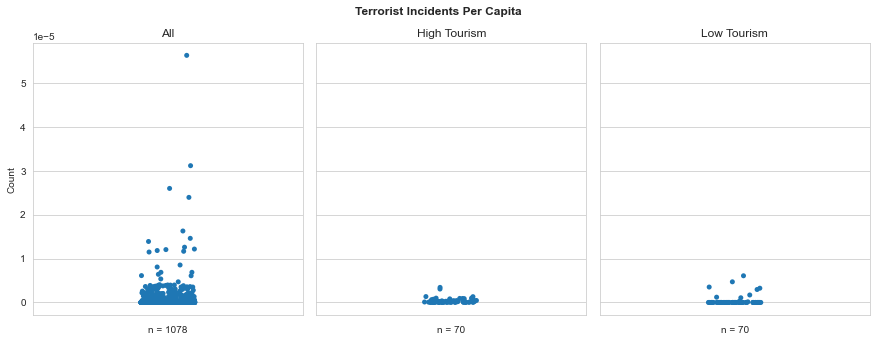

In [12]:
# find sample sizes
all_df_n, high_df_n, low_df_n = ['n = ' + str(len(i)) for i in [all_df, high_df, low_df]]  

# set style
sns.set_style('whitegrid')

# create figure
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
fig.suptitle('Terrorist Incidents Per Capita\n', fontsize=12, fontweight ="bold")

# create strip plots
sns.stripplot(y=all_df['incidents_per_capita'],  ax=axs[0])
sns.stripplot(y=high_df['incidents_per_capita'], ax=axs[1])
sns.stripplot(y=low_df['incidents_per_capita'],  ax=axs[2])

# set subplot titles and axis labels
axs[0].set(ylabel='Count', xlabel=all_df_n,  title='All')
axs[1].set(ylabel=None,    xlabel=high_df_n, title='High Tourism')
axs[2].set(ylabel=None,    xlabel=low_df_n,  title='Low Tourism')

# place subplots closer together
fig.subplots_adjust(wspace=.05, hspace=0)

**Key takeaway:** Low tourism countries have slightly more incidents per capita than high tourism countries.

TODO
* Explore: focus in on high/low data; any insights?
* Analyze: High outliers in low tourism vs. Higher overall in high tourism?
* Add: visualize median, 25/75 percentile